In [1]:
import numpy as np
import funcs.CCE as CCE
from funcs.likelihood_funcs import *
from funcs.GP_funcs import *
from funcs.utils import *
from funcs.kernel_param_funcs import *
import pickle
import matplotlib.pyplot as plt

In [2]:
with open('tuned_params.pkl', 'rb') as f:
    tuned_params_sim_lm = pickle.load(f)

with open('param_dict_sim_lm_full.pkl', 'rb') as f:
    param_dict = pickle.load(f)

with open('R_dict_sim_lm_full.pkl', 'rb') as f:
    R = pickle.load(f)

In [ ]:
SIMNUMS = ["0001", "0002", "0003", "0004", "0005", "0006", "0007", "0008", "0009", "0010", "0011", "0012", "0013"]
TRAINING_SPH_MODES = [(2, 2), (2, 1), (3, 3), (3, 2), (4, 4), (2, -2), (2, -1), (3, -3), (3, -2), (4, -4)]

SIM_TRAINING_MODE_RULES = {
    "0001": "PE",
    "0002": "PE",
    "0003": "PE",
    "0004": "PE",
    "0005": "P",
    "0006": "P",
    "0007": "P",
    "0008": "ALL",
    "0009": "E",
    "0010": "P",
    "0011": "P",
    "0012": "P",
    "0013": "ALL",
}

SMOOTHNESS = 16
EPSILON = 1 / 10

# These are the times must be the same as those used to generate R

TRAINING_START_TIME = -10
TRAINING_END_TIME = 100
TIME_STEP = 0.1

SIGMA_MAX_LOWER, SIGMA_MAX_UPPER = 0.1, 2
T_S_LOWER, T_S_UPPER = -10, 10
LENGTH_SCALE_LOWER, LENGTH_SCALE_UPPER = 0.1, 5
PERIOD_LOWER, PERIOD_UPPER = 0.1, 5

HYPERPARAM_RULE_DICT = {
    "sigma_max": "multiply",
    "t_s": "sum",
    "length_scale": "multiply",
    "period": "multiply",
}


In [ ]:
# White Noise Kernel

BOUNDS_S = [
    (SIGMA_MAX_LOWER, SIGMA_MAX_UPPER),
]

INITIAL_PARAMS_S = [1.] 

HYPERPARAM_RULE_DICT_S = {
    "sigma_max": "multiply",
}

hyperparam_list_s, le, tuned_params_sim_lm_s = train_hyper_params(
    TRAINING_START_TIME,
    TRAINING_END_TIME,
    TIME_STEP,
    INITIAL_PARAMS_S,
    BOUNDS_S,
    param_dict,
    R,
    HYPERPARAM_RULE_DICT_S,
    kernel_s,
    TRAINING_SPH_MODES,
    SIM_TRAINING_MODE_RULES,
    )

In [ ]:
# Main kernel (for comparison)

SIGMA_MAX_LOWER, SIGMA_MAX_UPPER = 0.1, 5
T_S_LOWER, T_S_UPPER = -20, 30
LENGTH_SCALE_LOWER, LENGTH_SCALE_UPPER = 0.1, 5
PERIOD_LOWER, PERIOD_UPPER = 0.1, 5

BOUNDS_MAIN = [
    (SIGMA_MAX_LOWER, SIGMA_MAX_UPPER),
    (T_S_LOWER, T_S_UPPER),
    (LENGTH_SCALE_LOWER, LENGTH_SCALE_UPPER),
    (PERIOD_LOWER, PERIOD_UPPER),
]

INITIAL_PARAMS_MAIN = [1.0, 0.0, 1.0, 1.0]

HYPERPARAM_RULE_DICT_MAIN = {
    "sigma_max": "multiply",
    "t_s": "sum",
    "length_scale": "multiply",
    "period": "multiply",
}

hyperparam_list_main, le, tuned_params_sim_lm_main = train_hyper_params(
    TRAINING_START_TIME,
    TRAINING_END_TIME,
    TIME_STEP,
    INITIAL_PARAMS_MAIN,
    BOUNDS_MAIN,
    param_dict,
    R,
    HYPERPARAM_RULE_DICT_MAIN,
    kernel_main,
    TRAINING_SPH_MODES,
    SIM_TRAINING_MODE_RULES,
    )

In [ ]:
# Complicated kernel

SIGMA_MAX_LOWER, SIGMA_MAX_UPPER = 0.1, 5
T_S_LOWER, T_S_UPPER = -10, 20
LENGTH_SCALE_LOWER, LENGTH_SCALE_UPPER = 0.1, 5
PERIOD_LOWER, PERIOD_UPPER = 0.1, 5

SMOOTHNESS_LOWER, SMOOTHNESS_UPPER = 0, 30
LENGTH_SCALE_2_LOWER, LENGTH_SCALE_2_UPPER = 0.1, 5
PERIOD_2_LOWER, PERIOD_2_UPPER = 0.1, 5
A_LOWER, A_UPPER = 0, 0.9

BOUNDS_C = [
    (SIGMA_MAX_LOWER, SIGMA_MAX_UPPER),
    (T_S_LOWER, T_S_UPPER),
    (SMOOTHNESS_LOWER, SMOOTHNESS_UPPER),
    (LENGTH_SCALE_LOWER, LENGTH_SCALE_UPPER),
    (PERIOD_LOWER, PERIOD_UPPER),
    (LENGTH_SCALE_2_LOWER, LENGTH_SCALE_2_UPPER),
    (PERIOD_2_LOWER, PERIOD_2_UPPER),
    (A_LOWER, A_UPPER),
]

INITIAL_PARAMS_C = [0.7805154283170234, -0.005843760691585904, SMOOTHNESS, 2.9693696011904516, 0.4625481109994475, 2.9693696011904516, 0.4625481109994475, 0.5] 

HYPERPARAM_RULE_DICT_C = {
    "sigma_max": "multiply",
    "t_s": "sum",
    "sharpness": "replace",
    "length_scale": "multiply",
    "period": "multiply",
    "length_scale_2": "multiply",
    "period_2": "multiply",
    "a": "replace",
}

hyperparam_list_c, le, tuned_params_sim_lm_c = train_hyper_params(
    TRAINING_START_TIME,
    TRAINING_END_TIME,
    TIME_STEP,
    INITIAL_PARAMS_C,
    BOUNDS_C,
    param_dict,
    R,
    HYPERPARAM_RULE_DICT_C,
    kernel_c,
    TRAINING_SPH_MODES,
    SIM_TRAINING_MODE_RULES,
    )

Check similarity of kernels with KL divergence 

In [ ]:
analysis_times = np.arange(
        TRAINING_START_TIME,
        TRAINING_START_TIME + TRAINING_END_TIME,
        TIME_STEP,
    )

In [ ]:
sn_list_full = []
cn_list_full = []
sc_list_full = []

for sim_id in SIMNUMS:

    sn_list = []
    cn_list = []
    sc_list = []

    spherical_modes = param_dict[sim_id].keys()

    if sim_id == "0001" or sim_id == "0002" or sim_id == "0003" or sim_id == "0004":
        spherical_modes = [mode for mode in spherical_modes if mode[1] >= 0 and mode[1] % 2 == 0]
    elif sim_id == "0005" or sim_id == "0006" or sim_id == "0007" or sim_id == "0010" or sim_id == "0011" or sim_id == "0012":
        spherical_modes = [mode for mode in spherical_modes if mode[1] >= 0]
    elif sim_id == "0009":
        spherical_modes = [mode for mode in spherical_modes if mode[1] % 2 == 0]
    elif sim_id == "0008" or sim_id == "0013":
        spherical_modes = spherical_modes

    for sph_mode in spherical_modes: 

        kernel_matrix_s = kernel_s(np.asarray(analysis_times), **tuned_params_sim_lm_s[sim_id][sph_mode]) + np.eye(len(analysis_times)) * 1e-12
        kernel_matrix = kernel_main(np.asarray(analysis_times), **tuned_params_sim_lm[sim_id][sph_mode]) + np.eye(len(analysis_times)) * 1e-12
        kernel_matrix_c = kernel_c(np.asarray(analysis_times), **tuned_params_sim_lm_c[sim_id][sph_mode]) + np.eye(len(analysis_times)) * 1e-12

        kl_div_sn = js_divergence(kernel_matrix_s, kernel_matrix)
        kl_div_cn = js_divergence(kernel_matrix, kernel_matrix_c)
        kl_div_sc = js_divergence(kernel_matrix_s, kernel_matrix_c)

        sn_list.append(kl_div_sn)
        cn_list.append(kl_div_cn)
        sc_list.append(kl_div_sc)

    sn_list_full.extend(sn_list)
    cn_list_full.extend(cn_list)
    sc_list_full.extend(sc_list)

    fig, ax = plt.subplots(figsize=(20, 6))

    spherical_mode_labels = [f"{mode[0]},{mode[1]}" for mode in spherical_modes]
    ax.scatter(spherical_mode_labels, np.log(cn_list), label='Normal,Complicated', marker='s')
    ax.scatter(spherical_mode_labels, np.log(sc_list), label='Simple,Complicated', marker='^')
    ax.scatter(spherical_mode_labels, np.log(sn_list), label='Simple,Normal', marker='o')

    ax.set_xlabel('Spherical mode', fontsize=16)
    ax.set_ylabel('Log of JS Divergence', fontsize=16)
    ax.legend(fontsize=14)
    ax.grid(True)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=14)

    fig.savefig(f'figs/JS_{sim_id}.pdf')
    plt.close(fig)

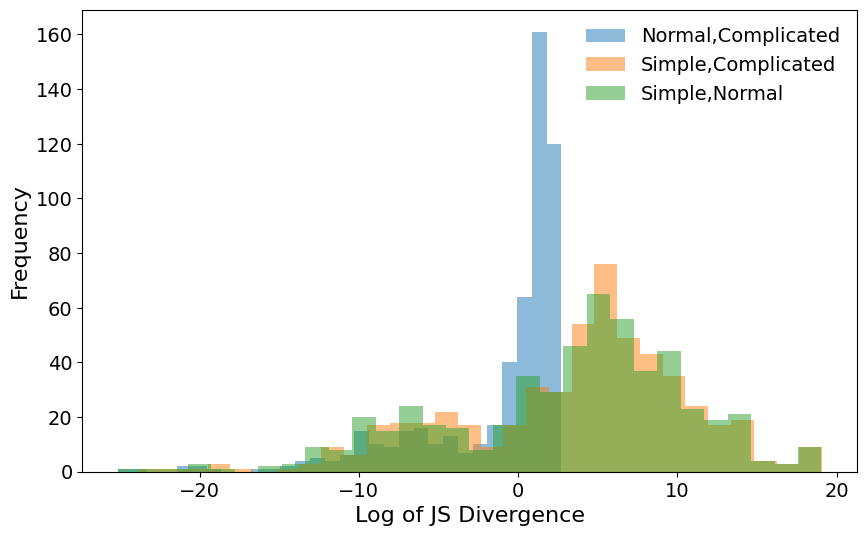

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

cn_log = np.log(cn_list_full)
sc_log = np.log(sc_list_full)
sn_log = np.log(sn_list_full)

cn_log[cn_log == -np.inf] = np.nan
sc_log[sc_log == -np.inf] = np.nan
sn_log[sn_log == -np.inf] = np.nan

ax.hist(cn_log, bins=30, alpha=0.5, label='Normal,Complicated')
ax.hist(sc_log, bins=30, alpha=0.5, label='Simple,Complicated')
ax.hist(sn_log, bins=30, alpha=0.5, label='Simple,Normal')

ax.set_xlabel('Log of JS Divergence', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)
ax.legend(frameon=False, fontsize=14)
ax.grid(False)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

fig.savefig(f'figs/JS_histogram.pdf')